In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.ticker import MaxNLocator

pd.set_option('display.max_columns', None)

In [2]:
cleads = pd.read_csv("Bank Leads Cleaned 20240118.csv")

In [3]:
cleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               68797 non-null  object 
 1   DOB                                  68797 non-null  object 
 2   Lead_Creation_Date                   68797 non-null  object 
 3   City_Code                            68797 non-null  object 
 4   City_Category                        68797 non-null  object 
 5   Employer_Category1                   68797 non-null  object 
 6   Employer_Category2                   68797 non-null  float64
 7   Monthly_Income                       68797 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  68797 non-null  object 
 9   Primary_Bank_Type                    68797 non-null  object 
 10  Contacted                            68797 non-null  object 
 11  Source                      

# Feature Engineering

## Add Age feature 

In [4]:
def age(births):
    current_year = datetime.today().year
    ages=[]
    for x in births:
        birth_year = datetime.strptime(str(x), "%Y-%m-%d").year
        ages.append(current_year - birth_year)
    return ages

cleads['Age'] = age(cleads['DOB'])

In [5]:
cleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               68797 non-null  object 
 1   DOB                                  68797 non-null  object 
 2   Lead_Creation_Date                   68797 non-null  object 
 3   City_Code                            68797 non-null  object 
 4   City_Category                        68797 non-null  object 
 5   Employer_Category1                   68797 non-null  object 
 6   Employer_Category2                   68797 non-null  float64
 7   Monthly_Income                       68797 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  68797 non-null  object 
 9   Primary_Bank_Type                    68797 non-null  object 
 10  Contacted                            68797 non-null  object 
 11  Source                      

In [6]:
cleads.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age
count,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000
mean,3.735948,3599.859583,348.049336,35692.762766,3.933471,19.215630,1082.756741,3.989723,0.014754,34.936829
std,0.786844,4810.412524,938.597201,24304.447313,0.912540,3.325489,670.955220,3.815124,0.120566,15.667161
min,1.000000,0.000000,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000,-44.000000
25%,4.000000,1640.000000,0.000000,29000.000000,4.000000,19.213570,900.387994,0.000000,0.000000,33.000000
50%,4.000000,2500.000000,0.000000,30000.000000,4.000000,19.213570,900.387994,2.000000,0.000000,37.000000
75%,4.000000,4000.000000,350.000000,36000.000000,4.000000,19.213570,1102.922701,7.000000,0.000000,41.000000
max,4.000000,97500.000000,42000.000000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000,55.000000


In [7]:
cleads.head()

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age
0,Female,1979-07-23,2016-07-15,C10001,A,A,4.0,2000.0,B001,P,N,S122,G,0.0,30000.0,4.0,19.21357,900.387994,0,0,45
1,Male,1986-12-07,2016-07-04,C10003,A,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25000,953.000000,10,0,38
2,Male,1982-12-10,2016-07-19,C10125,C,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,19.21357,1350.581991,0,0,42
3,Male,1989-01-30,2016-07-09,C10477,C,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,19.21357,2397.355046,7,0,35
4,Male,1985-04-19,2016-07-20,C10002,A,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,19.21357,2525.622064,10,0,39


In [8]:
# ages can't be negative, there must be some incorrectly entered data, also the dates aren't datetime format

In [9]:
dob = pd.to_datetime(cleads['DOB'], format="%Y-%m-%d")
cleads['DOB'] = dob

In [10]:
lead_date = pd.to_datetime(cleads['Lead_Creation_Date'], format="%Y-%m-%d")
cleads['Lead_Creation_Date'] = lead_date

In [11]:
cleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Gender                               68797 non-null  object        
 1   DOB                                  68797 non-null  datetime64[ns]
 2   Lead_Creation_Date                   68797 non-null  datetime64[ns]
 3   City_Code                            68797 non-null  object        
 4   City_Category                        68797 non-null  object        
 5   Employer_Category1                   68797 non-null  object        
 6   Employer_Category2                   68797 non-null  float64       
 7   Monthly_Income                       68797 non-null  float64       
 8   Customer_Existing_Primary_Bank_Code  68797 non-null  object        
 9   Primary_Bank_Type                    68797 non-null  object        
 10  Contacted 

In [12]:
cleads['DOB_Year'] = cleads['DOB'].dt.year

In [13]:
wrong_ages = cleads[cleads['Age'] < 0]
wrong_ages.shape

(2598, 22)

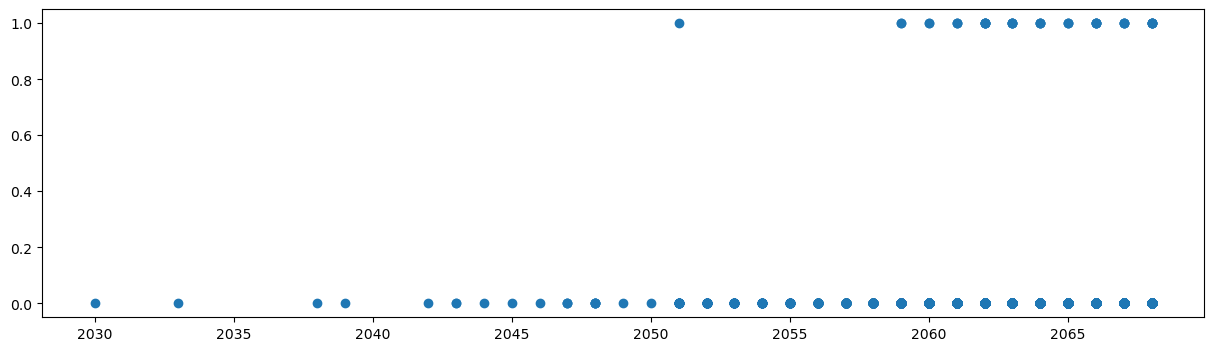

In [14]:
plt.figure(figsize=(15,4))
plt.scatter(x=wrong_ages['DOB_Year'], y=wrong_ages['Approved'])
plt.show()

In [15]:
dob_2000 = cleads[cleads['DOB'] > "2000-01-01"]

In [16]:
dob_2000.shape

(2598, 22)

In [17]:
# Can't delete the rows, they have too many Approved, we have to correct them. It looks like
# they're incorrectly entered. I will replace any 20-- with a 19--. 

In [18]:
def fix_dob(data):
    for idx, row in data.iterrows():
        if row['DOB'] > pd.Timestamp("2000-01-01"):
            data.at[idx, 'DOB'] = row['DOB'] - pd.DateOffset(years=100)

    return data

fix_dob(cleads)


,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,DOB_Year
0,Female,1979-07-23,2016-07-15,C10001,A,A,4.0,2000.0,B001,P,N,S122,G,0.0,30000.0,4.0,19.21357,900.387994,0,0,45,1979
1,Male,1986-12-07,2016-07-04,C10003,A,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25000,953.000000,10,0,38,1986
2,Male,1982-12-10,2016-07-19,C10125,C,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,19.21357,1350.581991,0,0,42,1982
3,Male,1989-01-30,2016-07-09,C10477,C,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,19.21357,2397.355046,7,0,35,1989
4,Male,1985-04-19,2016-07-20,C10002,A,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,19.21357,2525.622064,10,0,39,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68792,Female,1983-07-31,2016-09-30,C10006,A,A,1.0,4900.0,B002,P,N,S122,G,0.0,30000.0,4.0,19.21357,900.387994,10,0,41,1983
68793,Female,1971-01-27,2016-09-30,C10116,C,A,4.0,7190.1,B002,P,N,S122,G,1450.0,30000.0,4.0,19.21357,900.387994,7,0,53,1971
68794,Female,1992-02-01,2016-09-30,C10022,B,C,4.0,1600.0,B030,P,Y,S122,G,0.0,24000.0,4.0,35.50000,943.000000,2,0,32,1992
68795,Male,1978-06-27,2016-09-30,C10002,A,C,3.0,9893.0,B002,P,Y,S122,G,1366.0,80000.0,5.0,19.21357,2084.656562,10,0,46,1978


In [19]:
cleads.describe()

,DOB,Lead_Creation_Date,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,DOB_Year
count,68797,68797,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000,68797.000000
mean,1985-10-15 16:20:34.937569920,2016-08-17 12:55:19.888948480,3.735948,3599.859583,348.049336,35692.762766,3.933471,19.215630,1082.756741,3.989723,0.014754,34.936829,1989.063171
min,1930-07-24 00:00:00,2016-07-01 00:00:00,1.000000,0.000000,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000,-44.000000,1969.000000
25%,1982-11-25 00:00:00,2016-07-25 00:00:00,4.000000,1640.000000,0.000000,29000.000000,4.000000,19.213570,900.387994,0.000000,0.000000,33.000000,1983.000000
50%,1987-06-02 00:00:00,2016-08-19 00:00:00,4.000000,2500.000000,0.000000,30000.000000,4.000000,19.213570,900.387994,2.000000,0.000000,37.000000,1987.000000
75%,1990-08-03 00:00:00,2016-09-09 00:00:00,4.000000,4000.000000,350.000000,36000.000000,4.000000,19.213570,1102.922701,7.000000,0.000000,41.000000,1991.000000
max,1999-02-24 00:00:00,2016-09-30 00:00:00,4.000000,97500.000000,42000.000000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000,55.000000,2068.000000
std,NaN,NaN,0.786844,4810.412524,938.597201,24304.447313,0.912540,3.325489,670.955220,3.815124,0.120566,15.667161,15.667161


In [20]:
# Redo Age column

In [21]:
def age(births):
    current_year = datetime.today().year
    ages=[]
    for x in births:
        birth_year = x.year
        ages.append(current_year - birth_year)
    return ages

cleads['Age'] = age(cleads['DOB'])

In [22]:
cleads['Age'].describe()

count    68797.000000
mean        38.713156
std          7.070241
min         25.000000
25%         34.000000
50%         37.000000
75%         42.000000
max         94.000000
Name: Age, dtype: float64

## Add Lead_Creation month, day, day of week

In [23]:
def create_month(lead_creation_date):
    months = []
    for x in lead_creation_date:
        months.append(x.month)
    return months
    
cleads['Lead_Creation_Month'] = create_month(cleads['Lead_Creation_Date'])

In [24]:
def create_day(lead_creation_date):
    days = []
    for x in lead_creation_date:
        days.append(x.day)
    return days
    
cleads['Lead_Creation_Day'] = create_day(cleads['Lead_Creation_Date'])

In [25]:
def create_day_week(lead_creation_date):
    day_weeks = []
    for x in lead_creation_date:
        day_weeks.append(x.weekday())
    return day_weeks
    
# cleads['Lead_Creation_Day_of_Week'] = create_day_week(cleads['Lead_Creation_Date'])
cleads['Lead_Creation_Day_of_Week'] = create_day_week(cleads['Lead_Creation_Date'])

In [26]:
cleads.head()

,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,Customer_Existing_Primary_Bank_Code,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Age,DOB_Year,Lead_Creation_Month,Lead_Creation_Day,Lead_Creation_Day_of_Week
0,Female,1979-07-23,2016-07-15,C10001,A,A,4.0,2000.0,B001,P,N,S122,G,0.0,30000.0,4.0,19.21357,900.387994,0,0,45,1979,7,15,4
1,Male,1986-12-07,2016-07-04,C10003,A,C,1.0,3500.0,B002,P,Y,S122,G,0.0,20000.0,2.0,13.25000,953.000000,10,0,38,1986,7,4,0
2,Male,1982-12-10,2016-07-19,C10125,C,C,4.0,2250.0,B003,G,Y,S143,B,0.0,45000.0,4.0,19.21357,1350.581991,0,0,42,1982,7,19,1
3,Male,1989-01-30,2016-07-09,C10477,C,A,4.0,3500.0,B003,G,Y,S143,B,0.0,92000.0,5.0,19.21357,2397.355046,7,0,35,1989,7,9,5
4,Male,1985-04-19,2016-07-20,C10002,A,A,4.0,10000.0,B001,P,Y,S134,B,2500.0,50000.0,2.0,19.21357,2525.622064,10,0,39,1985,7,20,2


## Remove observations where Contacted!=1 if all not Approved

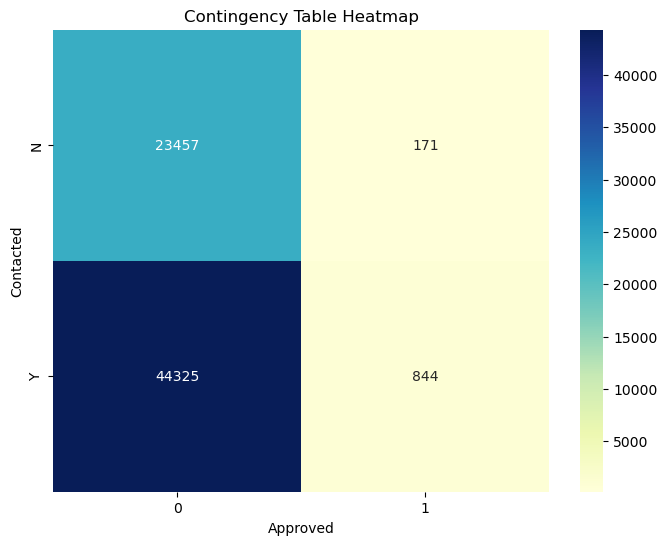

In [27]:
contingency_table = pd.crosstab(cleads['Contacted'], cleads['Approved'])

# Plot as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Contingency Table Heatmap")
plt.ylabel("Contacted")
plt.xlabel("Approved")
plt.show()

In [28]:
# We can't remove the observations which are not contacted as many of them were approved for loans.
# But we can see that being Contacted greatly improves the chances of being approved for a loan. 

In [29]:
now = datetime.now()
today = now.strftime("%Y%m%d")
# cleads.to_csv(f"Bank Leads Cleaned v2 {today}.csv", index=False)

In [30]:
cleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Gender                               68797 non-null  object        
 1   DOB                                  68797 non-null  datetime64[ns]
 2   Lead_Creation_Date                   68797 non-null  datetime64[ns]
 3   City_Code                            68797 non-null  object        
 4   City_Category                        68797 non-null  object        
 5   Employer_Category1                   68797 non-null  object        
 6   Employer_Category2                   68797 non-null  float64       
 7   Monthly_Income                       68797 non-null  float64       
 8   Customer_Existing_Primary_Bank_Code  68797 non-null  object        
 9   Primary_Bank_Type                    68797 non-null  object        
 10  Contacted 

# EDA

In [31]:
numerical = cleads[['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Age', 'Approved', 'Interest_Rate', 'EMI']]
categorical = cleads.drop(numerical.columns, axis=1)
categorical['Approved'] = cleads['Approved']

In [32]:
# sns.pairplot(data=numerical, hue="Approved")

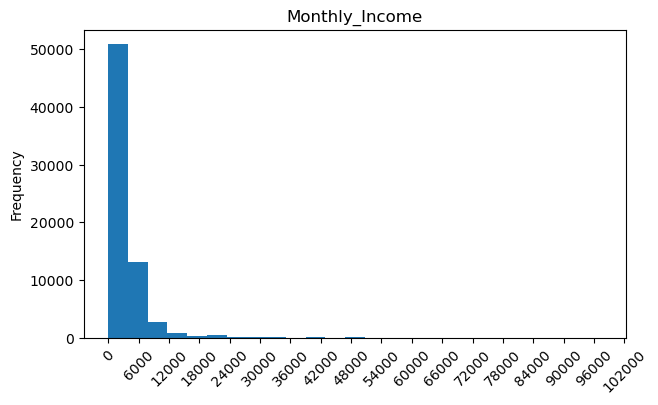

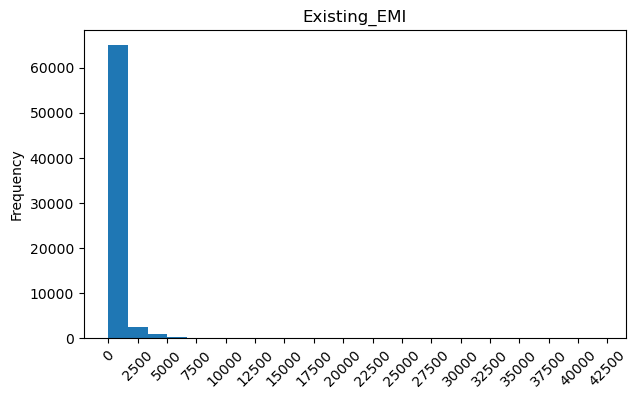

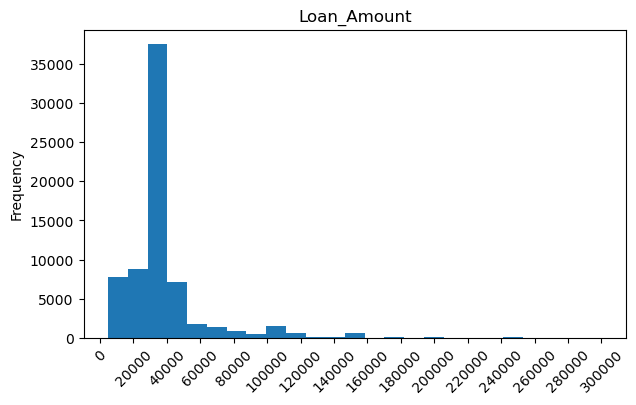

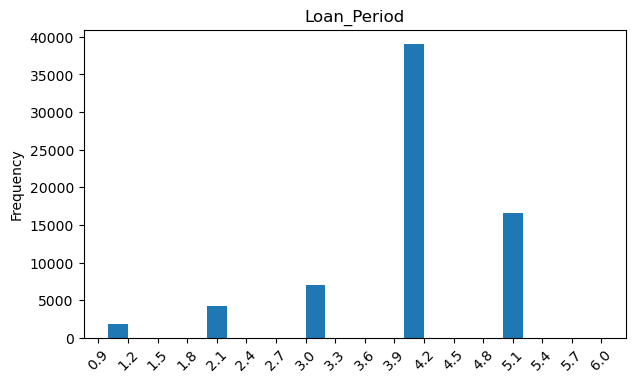

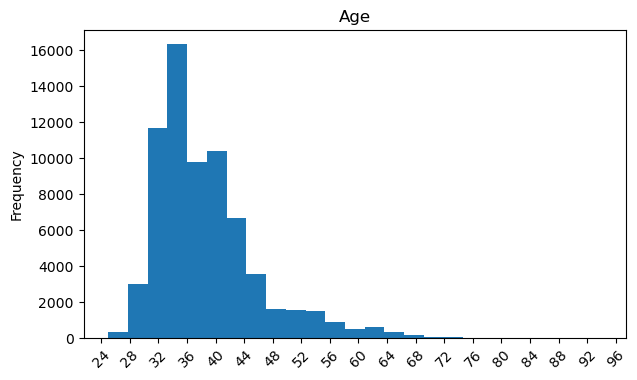

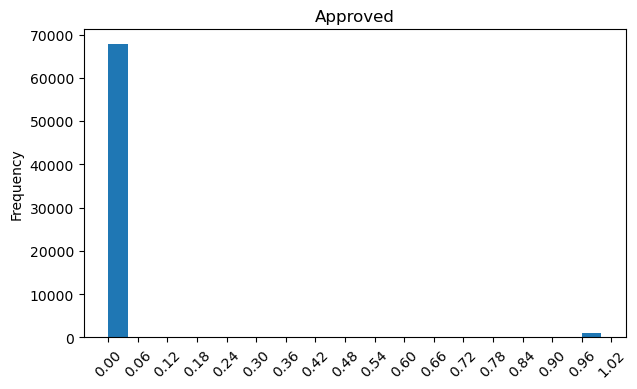

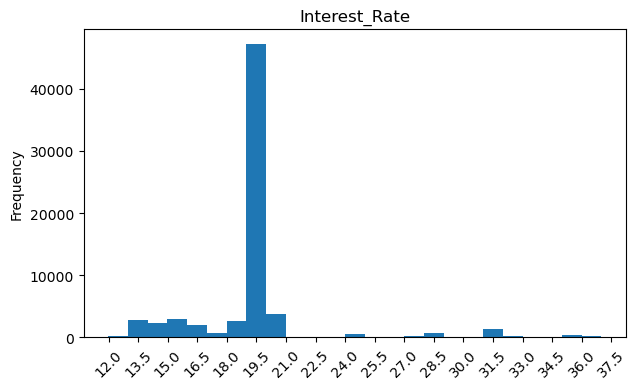

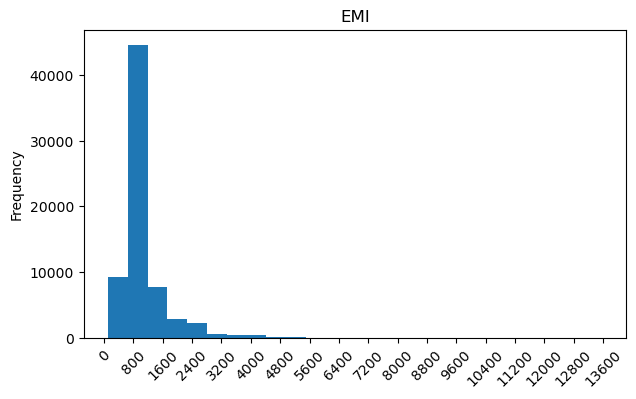

In [33]:
def num_hists(data):
    for col in data.columns:
        plt.figure(figsize=(7, 4))
        data[col].plot.hist(bins=25)
        plt.title(col)
        plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Set max number of x-ticks to 20
        plt.xticks(rotation=45)
        plt.show()

num_hists(numerical)

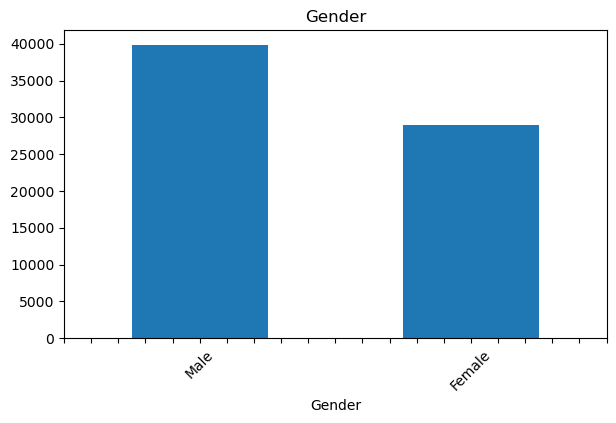

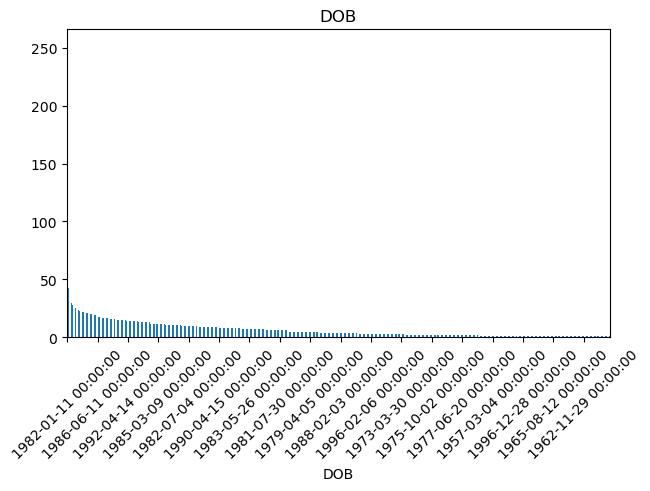

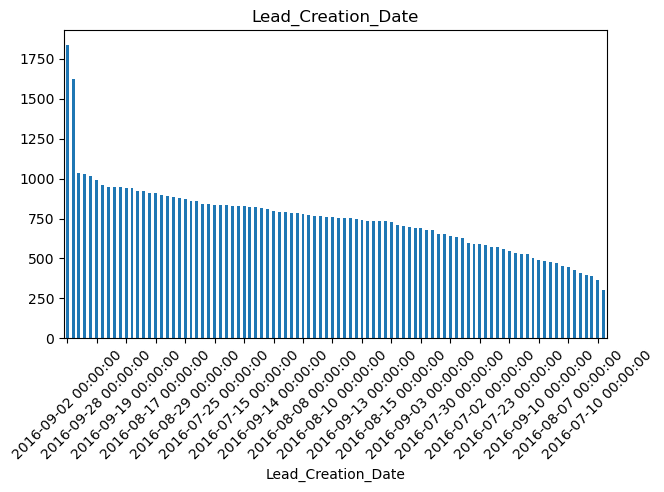

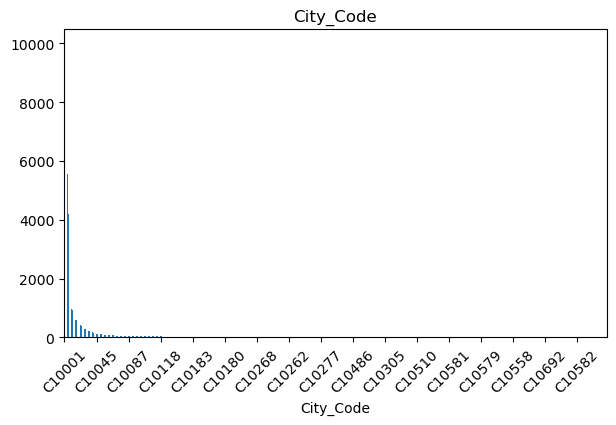

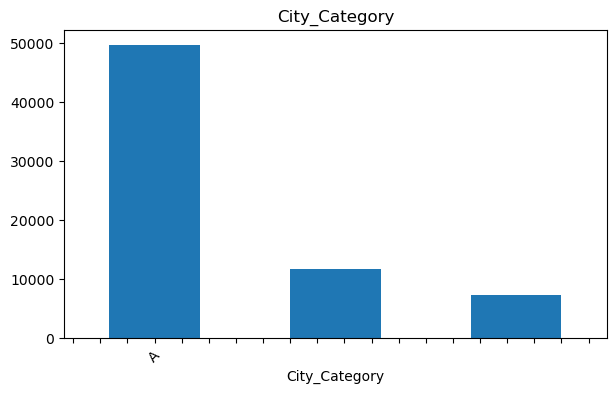

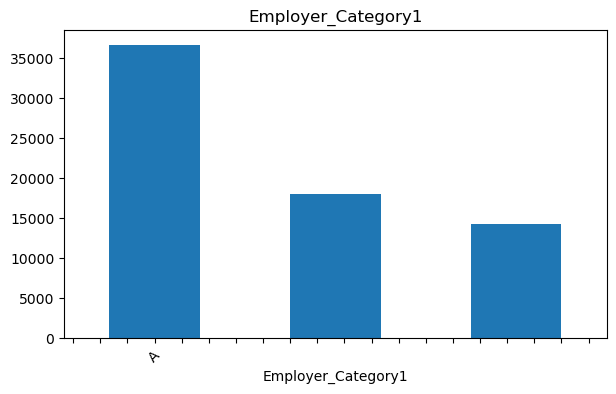

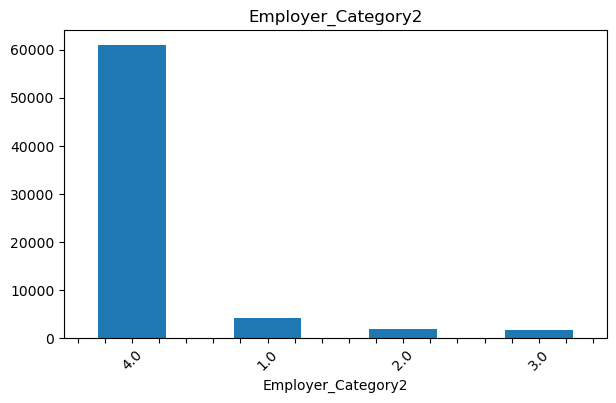

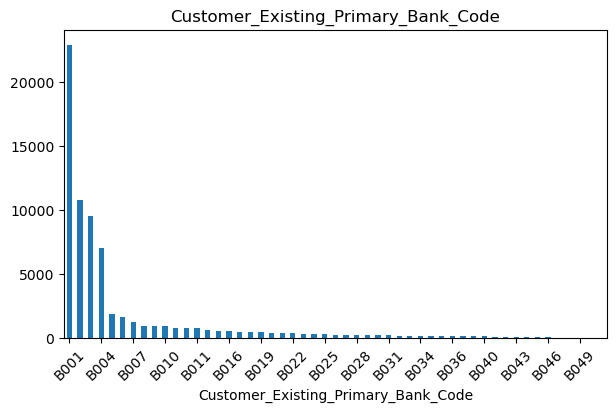

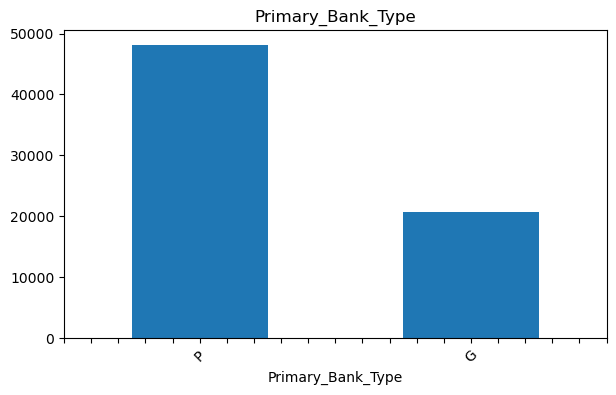

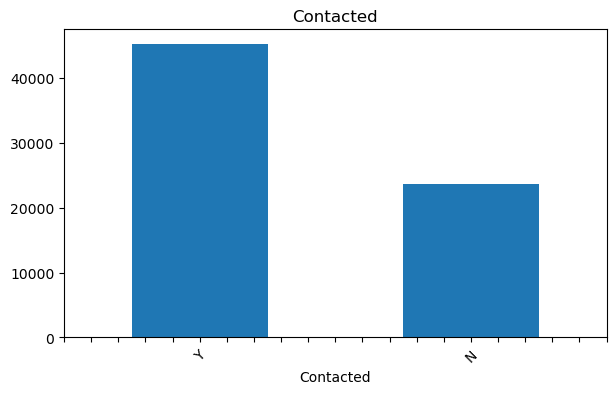

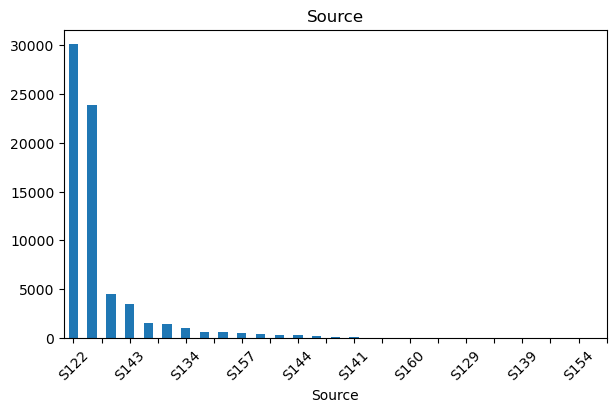

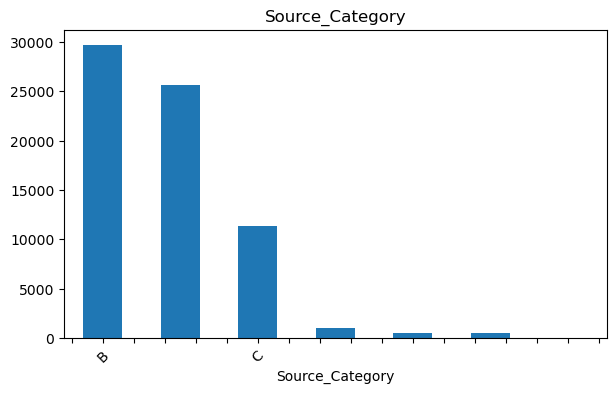

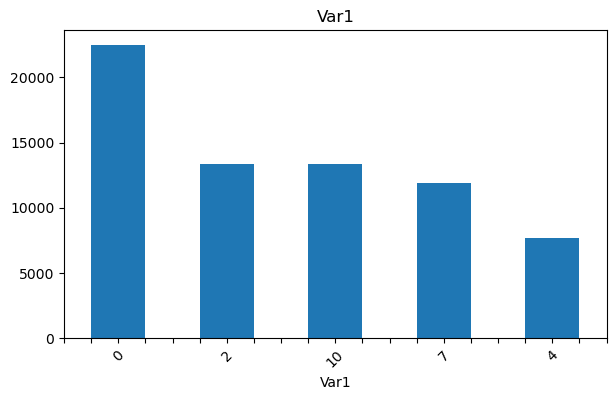

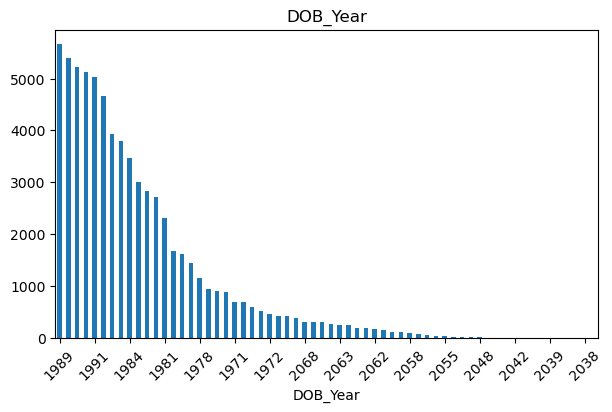

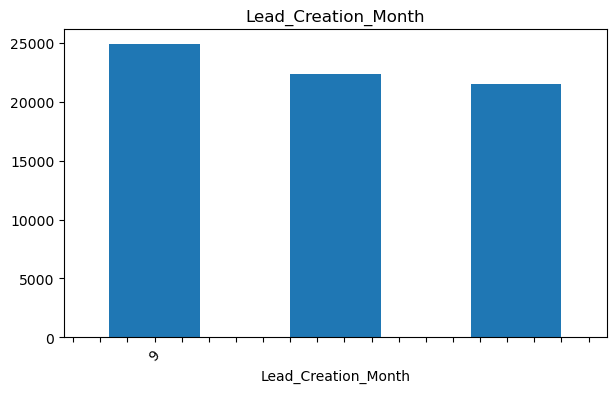

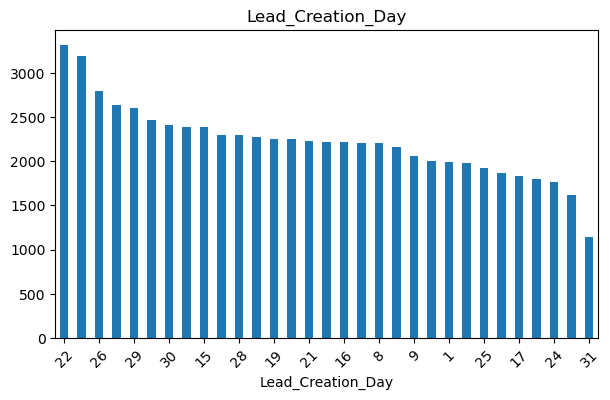

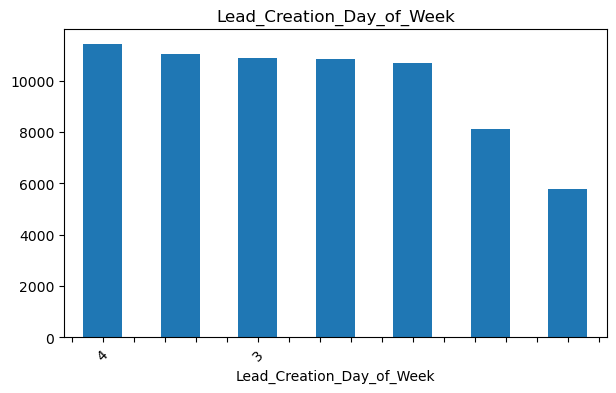

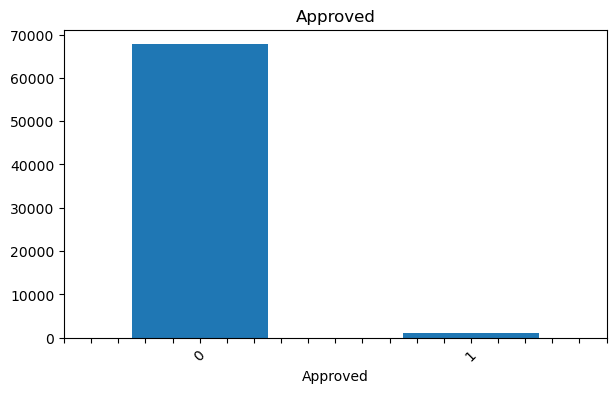

In [34]:
def cat_hists(data):
    for col in data.columns:
        plt.figure(figsize=(7, 4))
        data[col].value_counts().plot(kind="bar")
        plt.title(col)
        plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))  # Set max number of x-ticks to 20
        plt.xticks(rotation=45)
        plt.show()

cat_hists(categorical)

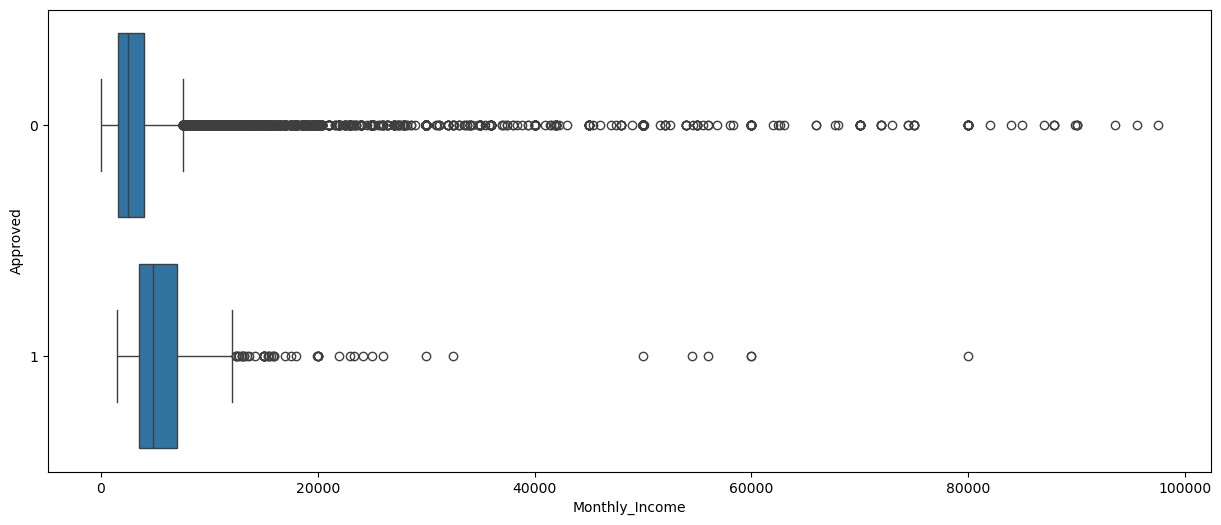

In [35]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cleads, x="Monthly_Income", y="Approved", orient="h")
plt.show()

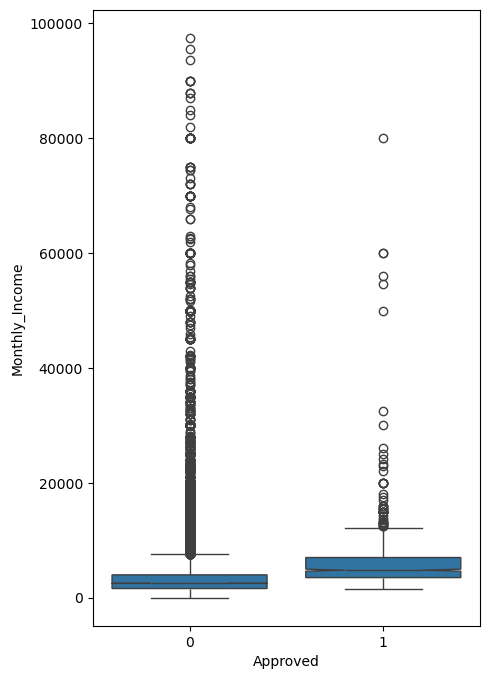

In [36]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cleads, y="Monthly_Income", x="Approved", orient="v", notch=True)
plt.show()

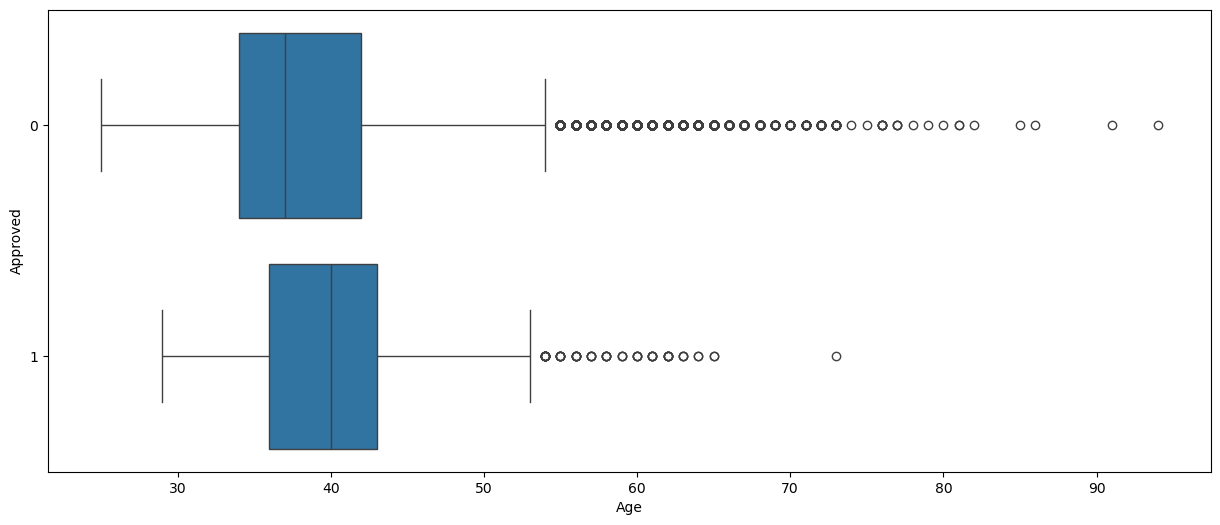

In [37]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cleads, x="Age", y="Approved", orient="h")
plt.show()

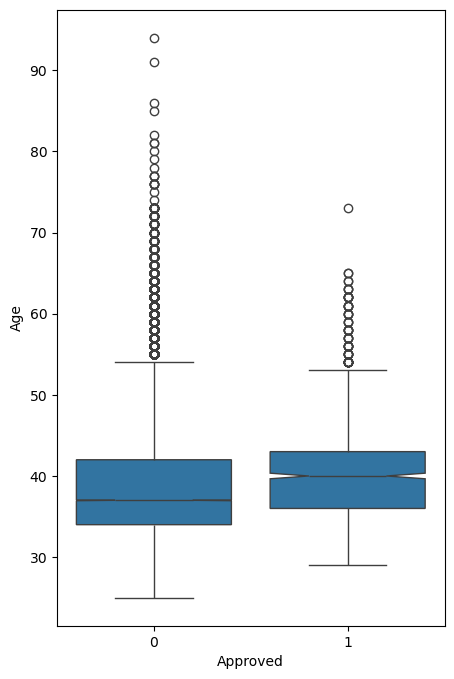

In [38]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=cleads, y="Age", x="Approved", orient="v", notch=True)
plt.show()

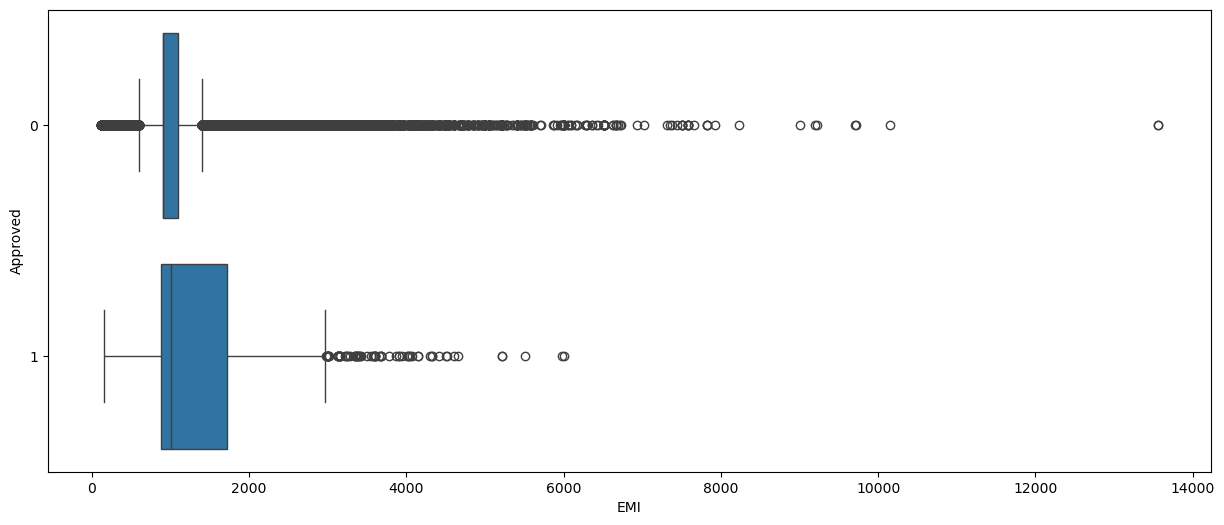

In [39]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cleads, x="EMI", y="Approved", orient="h")
plt.show()

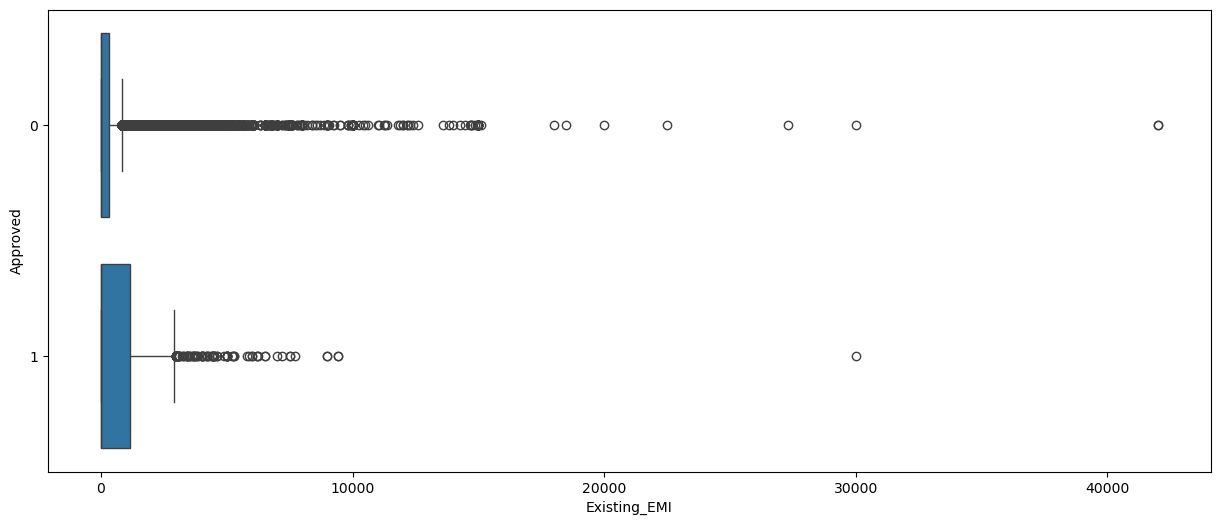

In [40]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=cleads, x="Existing_EMI", y="Approved", orient="h")
plt.show()

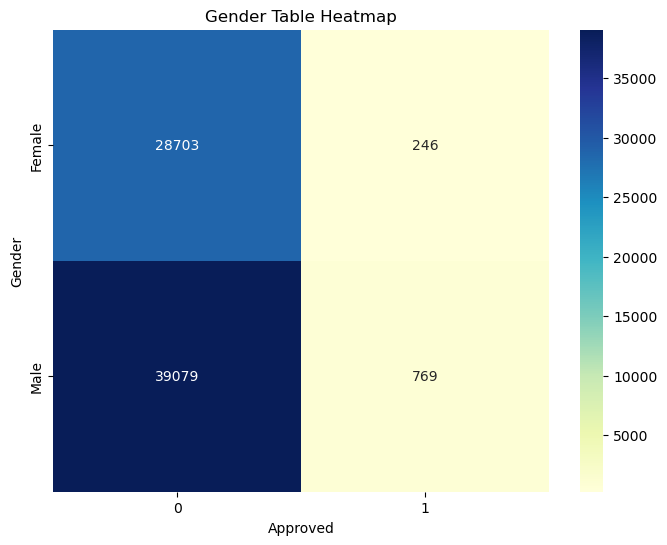

In [41]:
gender_table = pd.crosstab(cleads['Gender'], cleads['Approved'])

# Plot as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Gender Table Heatmap")
plt.ylabel("Gender")
plt.xlabel("Approved")
plt.show()

In [42]:
app_f = (gender_table[1].iloc[0]/gender_table[0].iloc[0])
app_m = (gender_table[1].iloc[1]/gender_table[0].iloc[1])

print("Female Approval Rate: ", np.round(app_f*100, 2))
print("Male Approval Rate: ", np.round(app_m*100, 2))

Female Approval Rate:  0.86
Male Approval Rate:  1.97


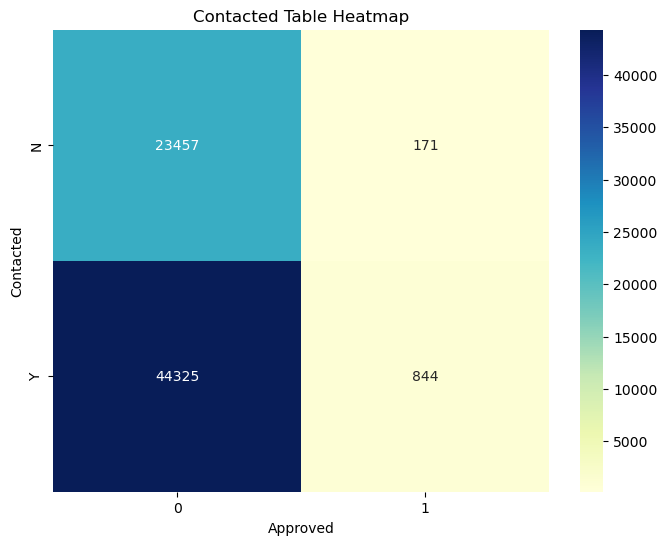

In [43]:
contacted_table = pd.crosstab(cleads['Contacted'], cleads['Approved'])

# Plot as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contacted_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Contacted Table Heatmap")
plt.ylabel("Contacted")
plt.xlabel("Approved")
plt.show()

In [44]:
app_c = (contacted_table[1].iloc[1]/contacted_table[0].iloc[1])
app_nc = (contacted_table[1].iloc[0]/contacted_table[0].iloc[0])

print("Contacted Approval Rate: ", np.round(app_c*100, 2))
print("Not Contacted Approval Rate: ", np.round(app_nc*100, 2))

Contacted Approval Rate:  1.9
Not Contacted Approval Rate:  0.73


In [47]:
from pandas_profiling import ProfileReport

profile = ProfileReport(cleads)

ImportError: cannot import name 'DataError' from 'pandas.core.base' (C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\pandas\core\base.py)

# Hypothesis Testing

## Does Monthly_Income have a significant impact on a loan being approved? 

**Hypothesis:** Monthly_Income plays a significant role in determining whether an application is approved. 

**Null Hypothesis:** Monthly_Income has no impact on the likelihood of a loan being approved. 

In [109]:
from scipy.stats import levene
from scipy.stats import mannwhitneyu
import scipy.stats as stats
from scipy.stats import chi2_contingency

approved = cleads[cleads['Approved']==1]
not_approved = cleads[cleads['Approved']!=1]
print("Approved: ", approved.shape)
print("Not Approved: ", not_approved.shape)

Approved:  (1015, 25)
Not Approved:  (67782, 25)


### check the distribution and variance to see if a Student's t-test is viable

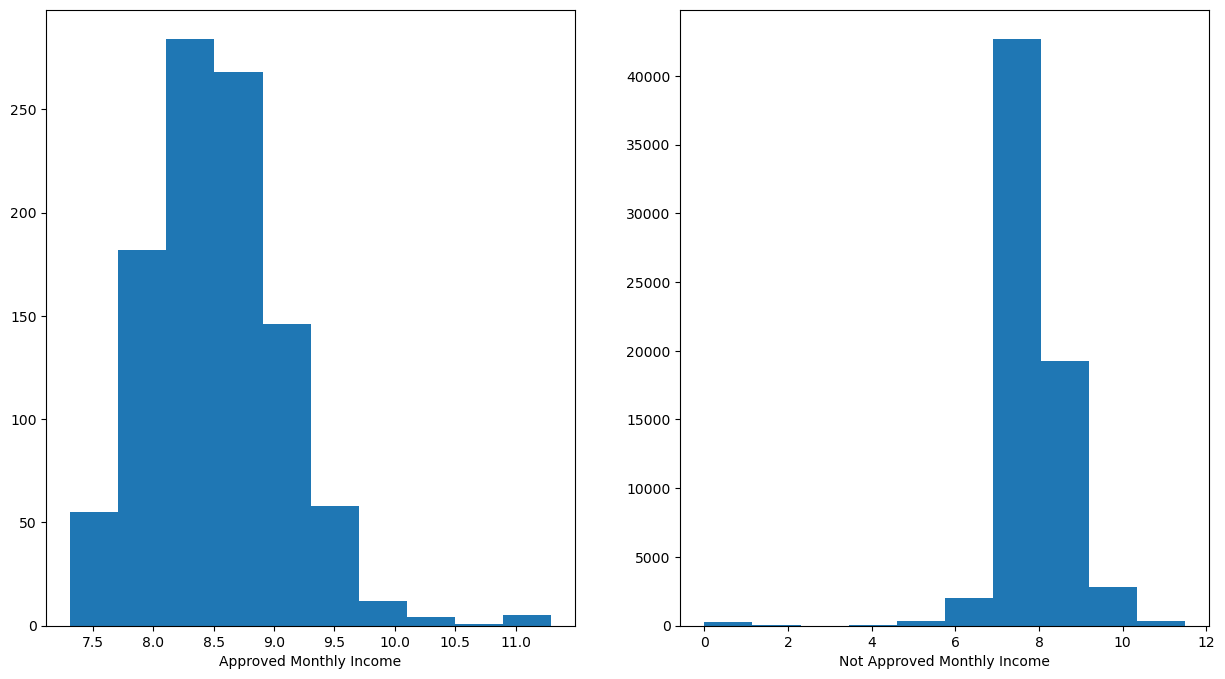

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.hist(x=np.log(approved['Monthly_Income'] + 1))
ax1.set_xlabel("Approved Monthly Income")

ax2.hist(x=np.log(not_approved['Monthly_Income'] + 1))
ax2.set_xlabel("Not Approved Monthly Income")


plt.show()

In [111]:
# When using the log of Monthly_Income the distributions are somewhat normally distributed. 

In [112]:
# Levene test of variance 

mi_group1_log = np.log(approved['Monthly_Income'] + 1)
mi_group2_log = np.log(not_approved['Monthly_Income'] + 1)

if levene(mi_group1_log, mi_group2_log)[1] < 0.05:
    print('Reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(mi_group1_log, mi_group2_log)[1]}.')
else:
    print('Fail to reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(mi_group1_log, mi_group2_log)[1]}.')

Reject the null hypothesis of equal variance between groups.
P-value is 2.4453695347634935e-11.


In [113]:
# Because there is not equal variance between the groups, we can not use a T-test.
# Instead, we will use the Mann Whitney U test. 

### Mann Whitney U test for Monthly Income

In [134]:
# Mann Whitney U hypothesis test 

# H0 = The distributions in the Monthly Incomes between the groups Approved and Not Approved are similar.
# HA = The distributions in the Monthly Incomes between the groups Approved and Not Approved are not similar.

mi_group1_log = np.log(approved['Monthly_Income'] + 1)
mi_group2_log = np.log(not_approved['Monthly_Income'] + 1)

if mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1] < 0.05:
    print("Reject the null hypothesis that Monthly Income are similar.")
    print(f"P-value is {mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1]}")
else:
    print("Fail to reject the null hypothesis that Monthly Income are similar.")
    print(f"P-value is {mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1]}")

Reject the null hypothesis that Monthly Income are similar.
P-value is 9.15927039197496e-221


In [133]:
# no log scaling of Monthly_Income

mi_group1_log = approved['Monthly_Income']
mi_group2_log = not_approved['Monthly_Income']

if mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1] < 0.05:
    print("Reject the null hypothesis that Monthly Income are similar.")
    print(f"P-value is {mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1]}")
else:
    print("Fail to reject the null hypothesis that Monthly Income are similar.")
    print(f"P-value is {mannwhitneyu(mi_group1_log, mi_group2_log, alternative='two-sided')[1]}")

Reject the null hypothesis that Monthly Income are similar.
P-value is 9.15927039197496e-221


### T-test for Monthly Income

In [115]:
# T-test 

# H0 = The distributions in the Monthly Incomes between the groups Approved and Not Approved are similar.
# HA = The distributions in the Monthly Incomes between the groups Approved and Not Approved are not similar.

group1 = np.log(approved['Monthly_Income'] + 1)
group2 = np.log(not_approved['Monthly_Income'] + 1)

t_statistic, p_value = stats.ttest_ind(group1, group2)

print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 24.695255925053445
p-value: 4.630082639170323e-134


## Does Age have a significant impact on a loan being approved? 

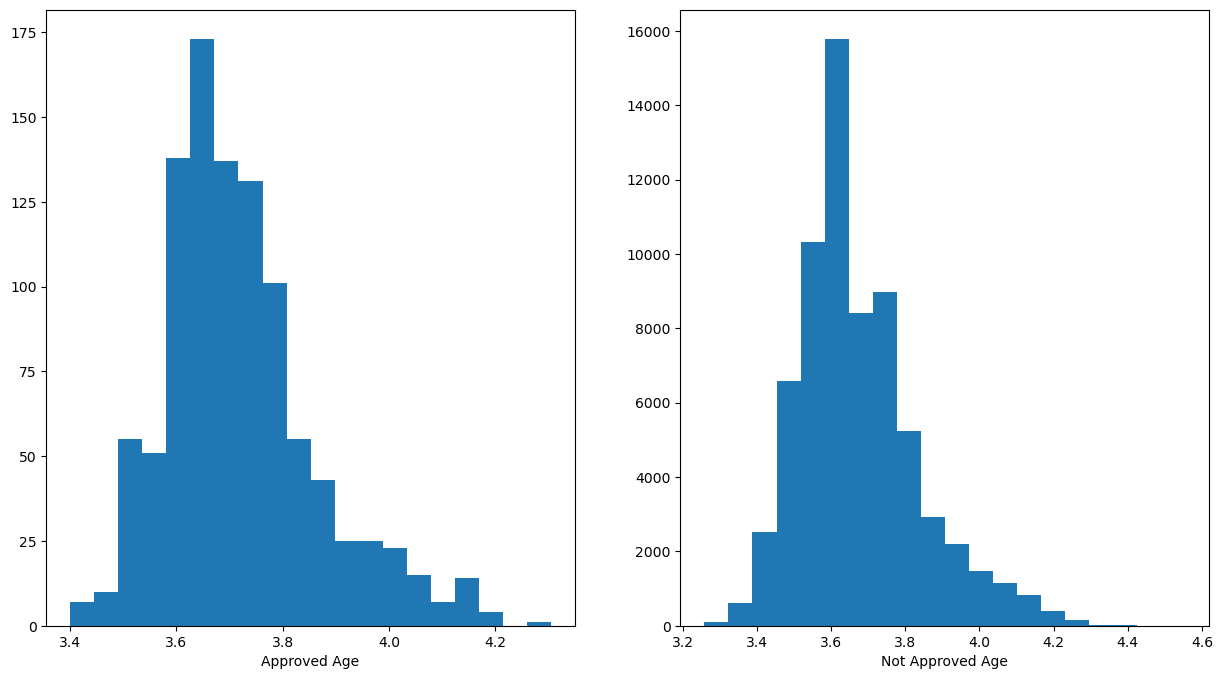

In [116]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.hist(x=np.log(approved['Age'] + 1), bins=20)
ax1.set_xlabel("Approved Age")

ax2.hist(x=np.log(not_approved['Age'] + 1), bins=20)
ax2.set_xlabel("Not Approved Age")


plt.show()

In [117]:
# Levene test of variance 

age_group1_log = np.log(approved['Age'] + 1)
age_group2_log = np.log(not_approved['Age'] + 1)

if levene(age_group1_log, age_group2_log)[1] < 0.05:
    print('Reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(age_group1_log, age_group2_log)[1]}.')
else:
    print('Fail to reject the null hypothesis of equal variance between groups.')
    print(f'P-value is {levene(age_group1_log, age_group2_log)[1]}.')

Reject the null hypothesis of equal variance between groups.
P-value is 0.0003688318237039589.


In [118]:
# Because there is not equal variance between the groups, we can not use a T-test.
# Instead, we will use the Mann Whitney U test.

### Mann Whitney U test for Age

In [119]:
# Mann Whitney U hypothesis test 

# H0 = The distributions in the Ages between the groups Approved and Not Approved are similar.
# HA = The distributions in the Ages between the groups Approved and Not Approved are not similar.

age_group1_log = np.log(approved['Age'] + 1)
age_group2_log = np.log(not_approved['Age'] + 1)

if mannwhitneyu(age_group1_log, age_group2_log, alternative='two-sided')[1] < 0.05:
    print("Reject the null hypothesis that Ages are similar.")
    print(f"P-value is {mannwhitneyu(age_group1_log, age_group2_log, alternative='two-sided')[1]}")
else:
    print("Fail to reject the null hypothesis that Ages are similar.")
    print(f"P-value is {mannwhitneyu(age_group1_log, age_group2_log, alternative='two-sided')[1]}")

Reject the null hypothesis that Ages are similar.
P-value is 5.366404302367249e-41


### T-test for Age

In [120]:
# T-test 

# H0 = The distributions in the Monthly Incomes between the groups Approved and Not Approved are similar.
# HA = The distributions in the Monthly Incomes between the groups Approved and Not Approved are not similar.

age_group1_log = np.log(approved['Age'] + 1)
age_group2_log = np.log(not_approved['Age'] + 1)

t_statistic, p_value = stats.ttest_ind(age_group1_log, age_group2_log)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 10.872919150875491
p-value: 1.6336949894249888e-27


## Does Gender have a significant impact on a loan being approved? 

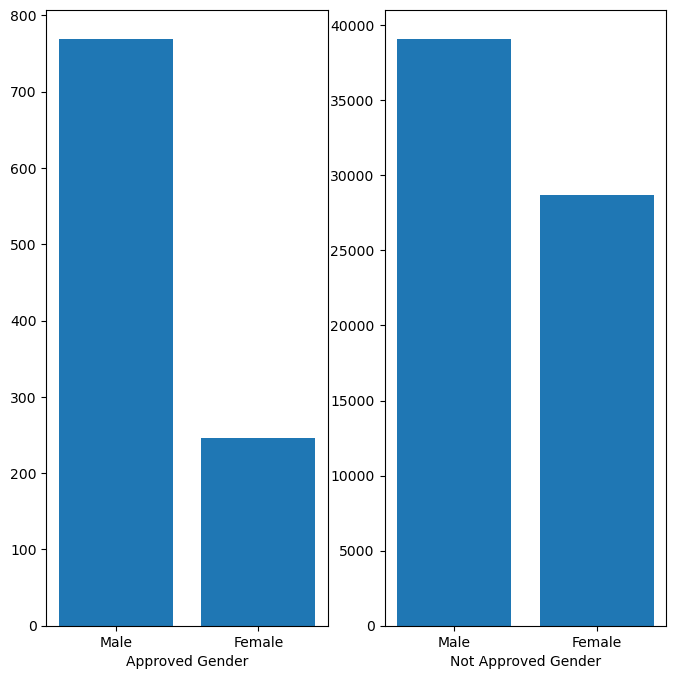

In [121]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

approved_gender_counts = approved['Gender'].value_counts()[['Male', 'Female']]
ax1.bar(approved_gender_counts.index, approved_gender_counts.values)
ax1.set_xlabel("Approved Gender")

not_approved_gender_counts = not_approved['Gender'].value_counts()[['Male', 'Female']]
ax2.bar(not_approved_gender_counts.index, not_approved_gender_counts.values)
ax2.set_xlabel("Not Approved Gender")


plt.show()

In [122]:
# Chi-squared test of independence 

# H0 = The distributions of Gender and Approved are the same. 
# HA = The distributions of Gender and Approved are not the same. 

gender_table = pd.crosstab(cleads['Gender'], cleads['Approved'])
data = gender_table

stat, p, dof, expected = chi2_contingency(data)

print("P-value is ", str(p))
if p <= 0.05:
    print("Reject H0, the distributions are different meaning there is a relationship between the Gender and Approved.")
else:
    print("Fail to reject H0, the distributions are the same meaning there is no relationship between Gender and Approved.")

P-value is  5.977403968721319e-31
Reject H0, the distributions are different meaning there is a relationship between the Gender and Approved.


## Does Contacted have a significant impact on a loan being approved? 

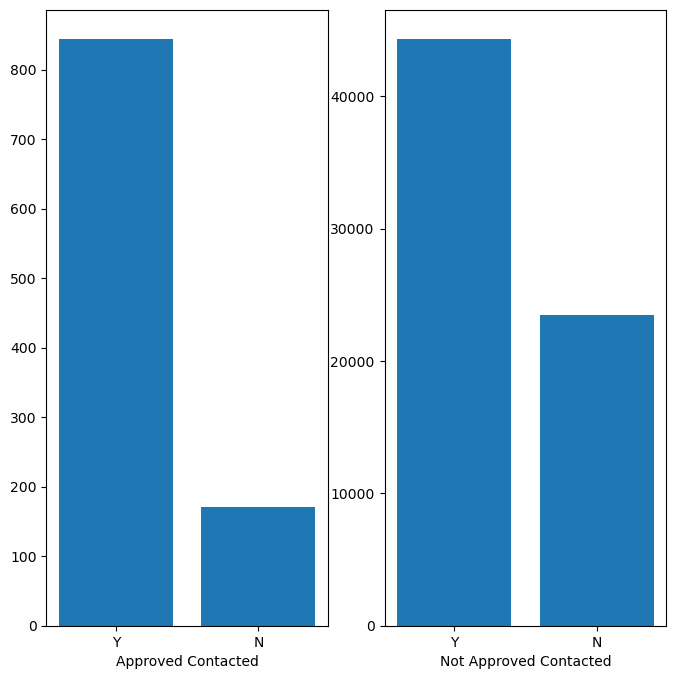

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

approved_contacted_counts = approved['Contacted'].value_counts()[['Y', 'N']]
ax1.bar(approved_contacted_counts.index, approved_contacted_counts.values)
ax1.set_xlabel("Approved Contacted")

not_approved_contacted_counts = not_approved['Contacted'].value_counts()[['Y', 'N']]
ax2.bar(not_approved_contacted_counts.index, not_approved_contacted_counts.values)
ax2.set_xlabel("Not Approved Contacted")


plt.show()

In [124]:
# Chi-squared test of independence 

# H0 = The distributions of Contacted and Approved are the same. 
# HA = The distributions of Contacted and Approved are not the same. 

gender_table = pd.crosstab(cleads['Contacted'], cleads['Approved'])
data = gender_table

stat, p, dof, expected = chi2_contingency(data)

print("P-value is ", str(p))
if p <= 0.05:
    print("Reject H0, the distributions are different meaning there is a relationship between the Contacted and Approved.")
else:
    print("Fail to reject H0, the distributions are the same meaning there is no relationship between Contacted and Approved.")

P-value is  4.21845658076776e-32
Reject H0, the distributions are different meaning there is a relationship between the Contacted and Approved.


In [125]:
# For each continuous feature: 
## Check distribution of each group
## Check variance of each group
## If feature is normally distributed and variance is similar, run T-test
## Print feature name, t-stat, p-value

# For each categorical feature: 
## Run Chi-squared test of independence 
## Print feature name, ch-stat, p-value 